In [142]:
import numpy as np
import matplotlib.pyplot as plt

In [143]:
dtype = np.dtype('float32')
path = "../LOFAR_2e_jaars_RP_2022_voor_studenten/Data_Pulsar1/L197621_SAP0_BEAM1_DM12.44_mask.dat"
with open( path, 'rb') as f:
    pulsar_data = np.fromfile(f, dtype)
pulsar_data

array([1354649.2, 1379855.1, 1374663.1, ..., 1479622.2, 1479622.2,
       1479622.2], dtype=float32)

In [144]:
len(pulsar_data)

69120

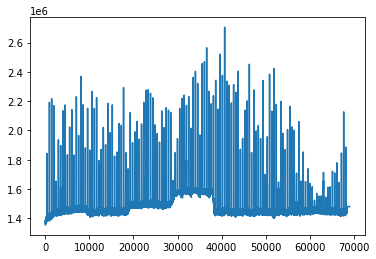

In [145]:
plt.plot(pulsar_data)

In [146]:
%matplotlib inline

(0.0, 209.80255598842447)

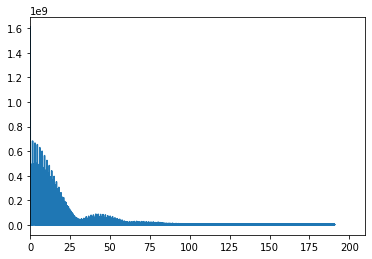

In [147]:
frequencies  = np.fft.fftfreq(69120, 0.00262143998406827)
transform = np.fft.fft(pulsar_data)
plt.plot(frequencies[1:], abs(transform[1:]))
plt.xlim(0)

following calculation does what we can do with fftfreq.

In [148]:
dt = 0.00262143998406827
nbins = len(pulsar_data)
total_time = dt * nbins
total_time

181.19393169879882

In [149]:
#dnu = 1 / total_time
#dnu

In [150]:
dnu = 1 / total_time
dnu

0.005518948623855206

In [151]:
from scipy.signal import find_peaks
peaks_index, properties = find_peaks(np.abs(transform), height=0.4* 10 **9)

In [152]:
peaks_index
peak_frequencies = [frequencies[i] for i in peaks_index]
print(peak_frequencies)
print(len(peak_frequencies))

[0.02759474311927603, 0.7450580642204528, 1.4956350770647608, 2.2406931412852136, 2.9912701541295217, 3.736328218349975, 4.4869052311942825, 5.231963295414736, 5.982540308259043, 6.7275983724794965, 7.478175385323804, 8.223233449544257, 8.973810462388565, 9.718868526609018, 10.469445539453327, 11.21450360367378, 11.965080616518087, 13.460715693582848, -13.460715693582848, -11.965080616518087, -11.21450360367378, -10.469445539453327, -9.718868526609018, -8.973810462388565, -8.223233449544257, -7.478175385323804, -6.7275983724794965, -5.982540308259043, -5.231963295414736, -4.4869052311942825, -3.736328218349975, -2.9912701541295217, -2.2406931412852136, -1.4956350770647608, -0.7450580642204528, -0.02759474311927603]
36


In [153]:
0.7450580642204528 ** -1

1.3421772718429543